In [15]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import h5py
from pylab import rcParams
import pandas as pd
rcParams['figure.figsize'] = 20,9

In [16]:
f = h5py.File('logs/predictions_default.h5', 'r')

labels = np.array(f['labels'][:]).astype(int)
probs = np.array(f['probs']).astype(float)
mc_cosmics = np.array(f['rec.mc.cosmic']).astype(float)
vtx_stop = np.array(f['vtx_stop']).astype(float)
y_preds = np.argmax(probs, axis=1)
#pms=f['pm']


In [17]:
clases=['muon', 'electron', 'piminus']
predicciones = {'pdm': [], 'pde': [], 'pdp': [], 'label_true': [], 'predic': [], 'calificacion': [], 'p.pz': [],
                'p.E': [], 'nhitslc': [], 'vtx.x': [], 'vtx.y': [], 'vtx.z': [], 'stop.x': [], 'stop.y': [],
                'stop.z': [], 'euclidean': []}

for y_true, ypred, prob, mc_cosmic, vtxstop in zip(labels, y_preds, probs, mc_cosmics, vtx_stop):

    #predicciones['nombre'].append(fname)
    predicciones['pdm'].append(float(prob[0]))
    predicciones['pde'].append(float(prob[1]))
    predicciones['pdp'].append(float(prob[2]))

    predicciones['label_true'].append(clases[y_true])

    predicciones['predic'].append(clases[ypred])
    if (clases[y_true] == clases[ypred]):
        predicciones['calificacion'].append('T' + str(clases[y_true]))
    else:
        predicciones['calificacion'].append('F' + str(clases[ypred]))
    predicciones['p.pz'].append(float(mc_cosmic[0]))
    predicciones['p.E'].append(float(mc_cosmic[1]))
    predicciones['nhitslc'].append(float(mc_cosmic[2]))
    predicciones['vtx.x'].append(float(vtxstop[0]))
    predicciones['vtx.y'].append(float(vtxstop[1]))
    predicciones['vtx.z'].append(float(vtxstop[2]))
    predicciones['stop.x'].append(float(vtxstop[3]))
    predicciones['stop.y'].append(float(vtxstop[4]))
    predicciones['stop.z'].append(float(vtxstop[5]))
    predicciones['euclidean'].append(float(np.sqrt(np.sum(
        np.square(np.array((vtxstop[0], vtxstop[1], vtxstop[2])) - np.array((vtxstop[3], vtxstop[4], vtxstop[5],)))))))
dfpred = pd.DataFrame(data=predicciones)


In [18]:
dfpred

,pdm,pde,pdp,label_true,predic,calificacion,p.pz,p.E,nhitslc,vtx.x,vtx.y,vtx.z,stop.x,stop.y,stop.z,euclidean
0,1.390541e-11,1.000000,2.182731e-07,electron,electron,Telectron,0.247699,2.915836,59.0,-55.321003,19.705582,133.127991,-125.709305,-73.477669,136.426880,116.826854
1,6.799713e-01,0.093115,2.269142e-01,electron,muon,Fmuon,2.024318,4.441499,115.0,116.746117,11.722279,520.645752,18.740276,-9.174813,572.945618,113.035875
2,7.509509e-12,1.000000,1.528038e-07,electron,electron,Telectron,-3.880131,4.656539,93.0,63.007545,74.533340,206.849045,96.256195,54.495739,143.784027,74.055213
3,2.163492e-05,0.995748,4.230811e-03,electron,electron,Telectron,1.642419,3.160030,93.0,101.313164,-133.330917,440.896332,123.328423,-72.386742,479.080750,75.212459
4,5.424218e-07,0.999824,1.754187e-04,electron,electron,Telectron,-4.045322,4.660537,98.0,17.735720,69.939613,571.668579,31.629786,101.635078,513.611206,67.589246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49756,3.292556e-18,1.000000,3.192928e-11,electron,electron,Telectron,-0.150309,1.182726,47.0,2.317405,162.969681,304.511414,71.569351,109.675034,295.308868,87.868301
49757,3.041304e-05,0.003098,9.968715e-01,piminus,piminus,Tpiminus,1.490630,1.954756,61.0,36.731411,131.176300,216.573639,59.191292,152.021683,252.686356,47.361425
49758,1.122993e-05,0.996001,3.987901e-03,electron,electron,Telectron,0.587590,1.136293,41.0,105.066612,10.190153,98.405830,148.640396,72.285660,149.714172,91.580962
49759,7.456187e-05,0.032663,9.672619e-01,piminus,piminus,Tpiminus,-0.013783,0.489852,17.0,37.655045,121.090271,385.947876,-1.981756,86.241653,392.439117,53.175543


In [19]:
#caso 1
#dfpred=dfpred[dfpred['label_true']=='muon']
#dfpred=dfpred[dfpred['nhitslc']>100]
#dfpred=dfpred[dfpred['pdm']<0.3]
#caso 2
dfpred=dfpred[dfpred['label_true']=='muon']
dfpred=dfpred[dfpred['nhitslc']>150]
#caso 3
#dfpred=dfpred[dfpred['label_true']=='muon']
#dfpred=dfpred[dfpred['p.E']>3]

dfpred

,pdm,pde,pdp,label_true,predic,calificacion,p.pz,p.E,nhitslc,vtx.x,vtx.y,vtx.z,stop.x,stop.y,stop.z,euclidean
2870,0.771461,0.094748,0.133791,muon,muon,Tmuon,2.136396,2.220966,156.0,-164.477402,76.323486,184.383514,84.897522,104.650185,1125.151123,973.670349
4637,0.001784,0.073653,0.924563,muon,piminus,Fpiminus,2.413109,2.427154,160.0,-18.374325,148.524857,82.912155,73.234329,23.836750,1110.630737,1039.300127
5187,0.771461,0.094748,0.133791,muon,muon,Tmuon,2.471650,2.476603,158.0,24.520611,11.540556,218.742477,55.933140,85.132317,1179.635254,964.218555
6904,0.726217,0.094579,0.179204,muon,muon,Tmuon,2.321121,2.391040,165.0,168.220657,170.475739,140.917267,-31.039181,12.009477,1199.299683,1088.572174
7634,0.753156,0.094860,0.151984,muon,muon,Tmuon,1.927281,2.093673,152.0,114.442657,179.542999,316.116669,-146.063751,-64.609459,1192.075684,945.927168
7782,0.983384,0.001356,0.015260,muon,muon,Tmuon,1.975729,2.124751,158.0,-114.304092,-125.524071,88.595284,166.833847,165.969498,990.309143,988.481121
8301,0.986136,0.000987,0.012878,muon,muon,Tmuon,2.350492,2.442791,175.0,162.753464,167.093628,44.929321,3.272547,-97.516258,1144.807495,1142.446739
8968,0.971776,0.003389,0.024834,muon,muon,Tmuon,2.357052,2.468430,175.0,-114.690903,121.194771,36.878387,99.643463,-141.197769,1084.449341,1100.996806
9895,0.110461,0.068739,0.820800,muon,piminus,Fpiminus,2.517131,2.522622,158.0,132.236191,13.474989,106.581619,153.130203,33.816917,1152.225220,1046.050139
13274,0.771461,0.094748,0.133791,muon,muon,Tmuon,1.872772,2.032714,151.0,-16.920589,-111.136581,284.677307,168.944672,154.675339,1164.178711,937.403110


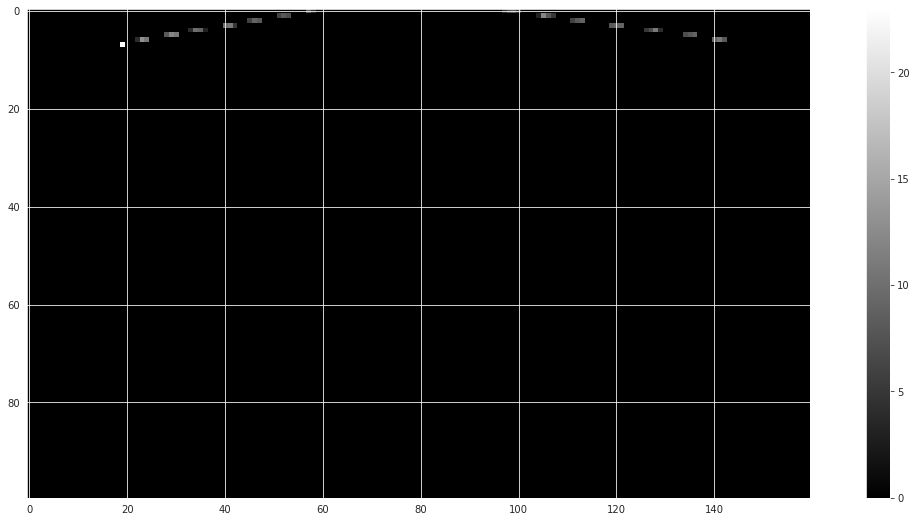

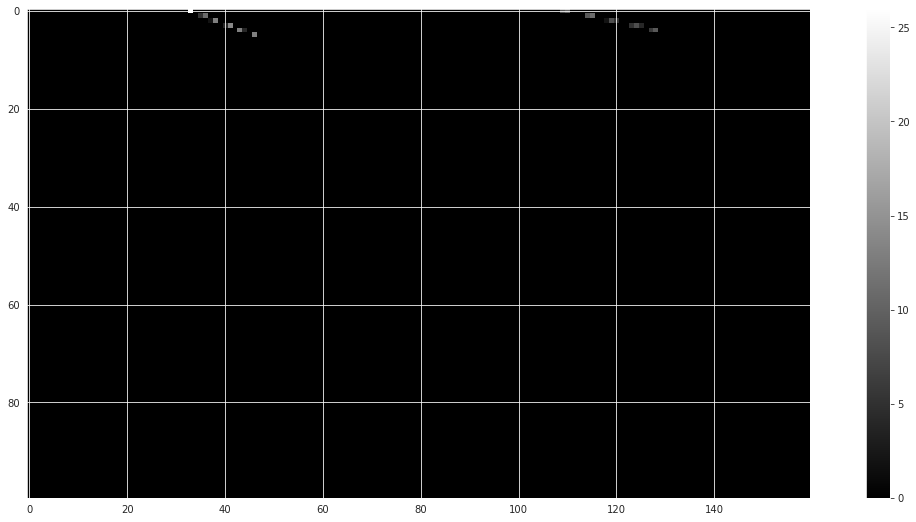

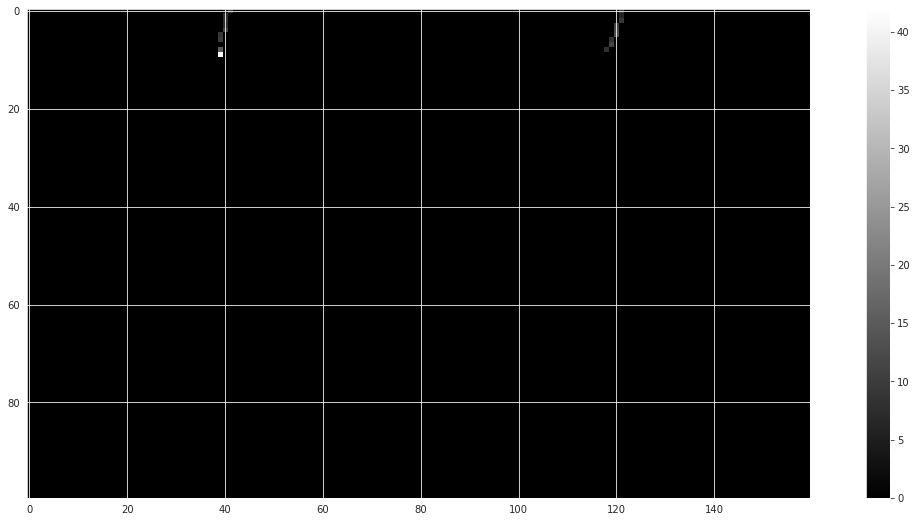

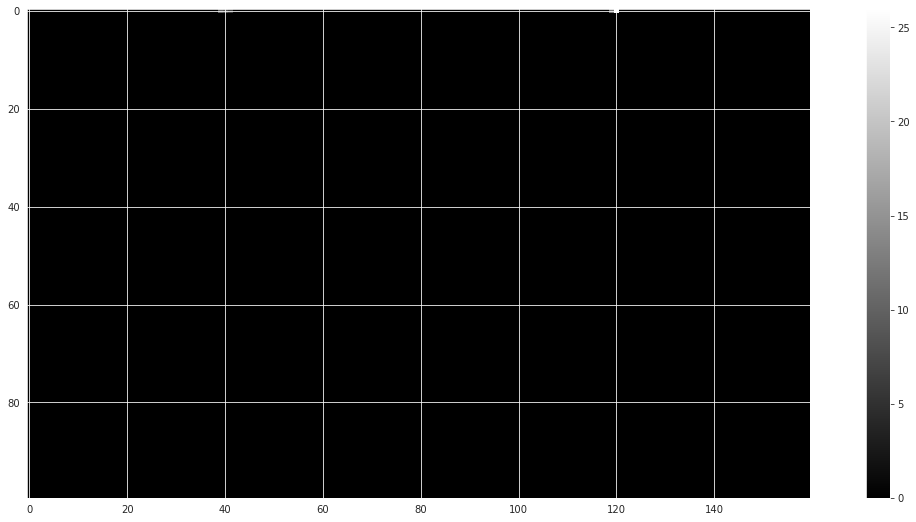

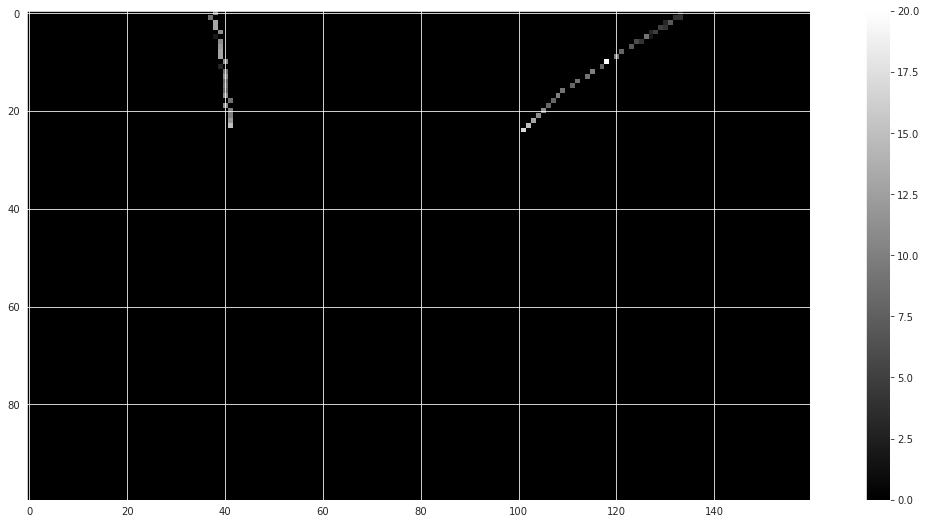

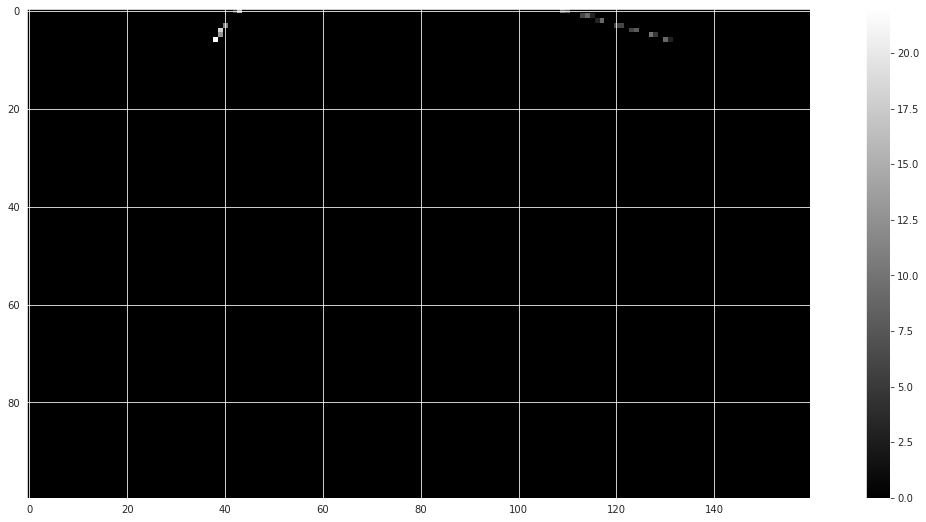

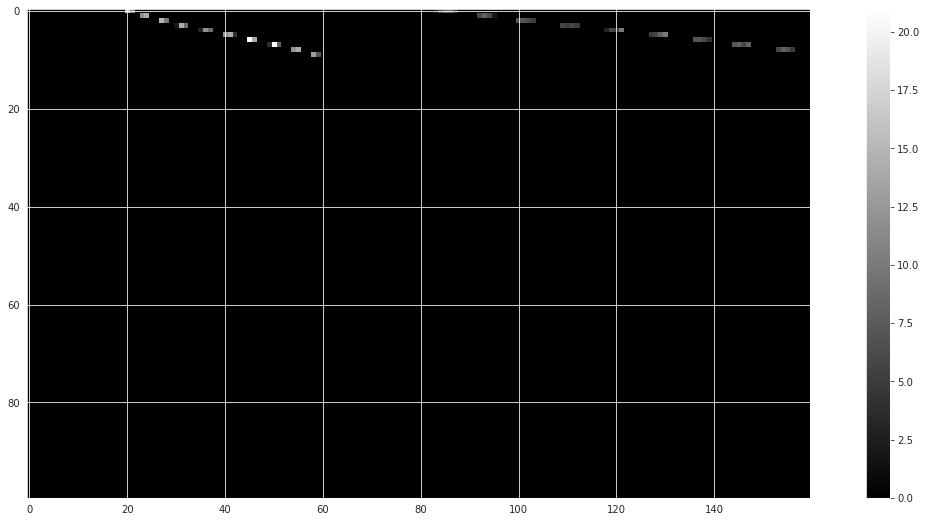

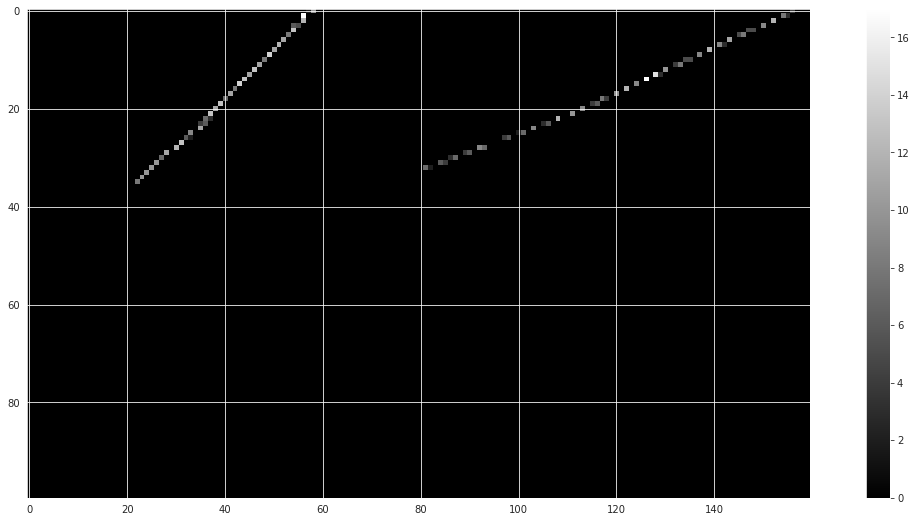

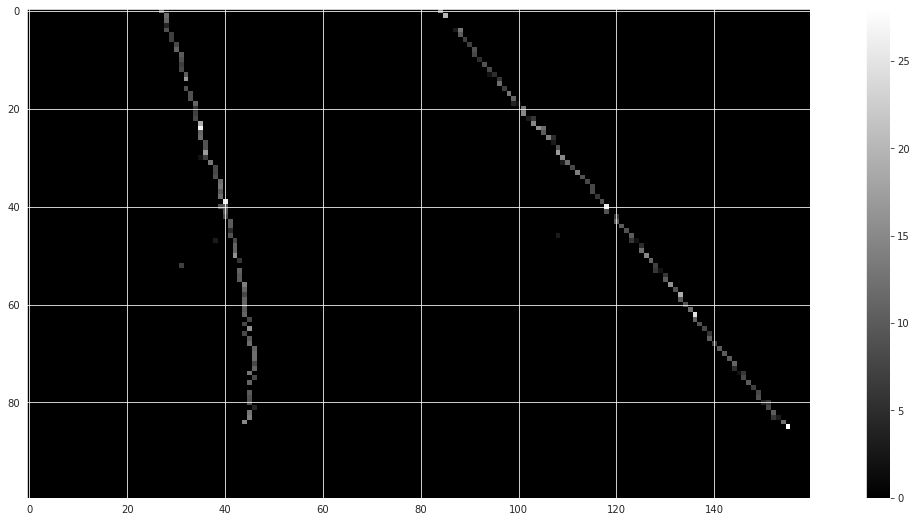

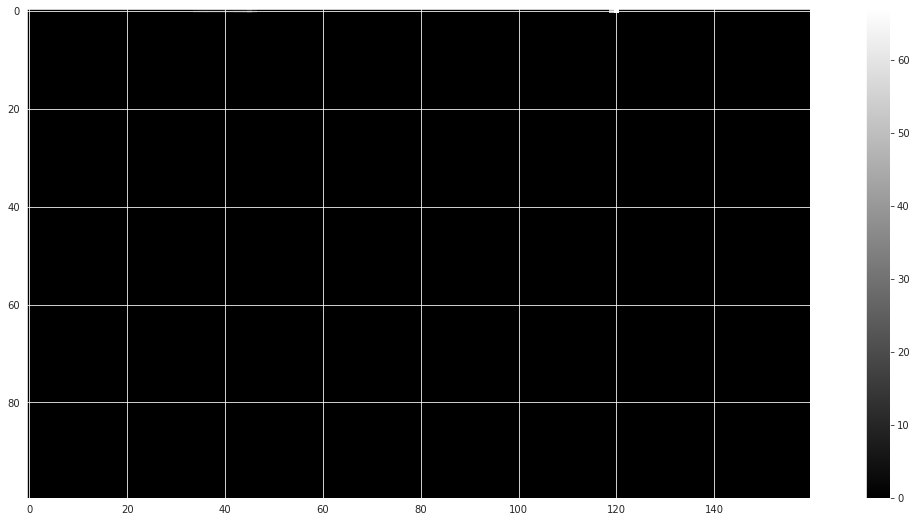

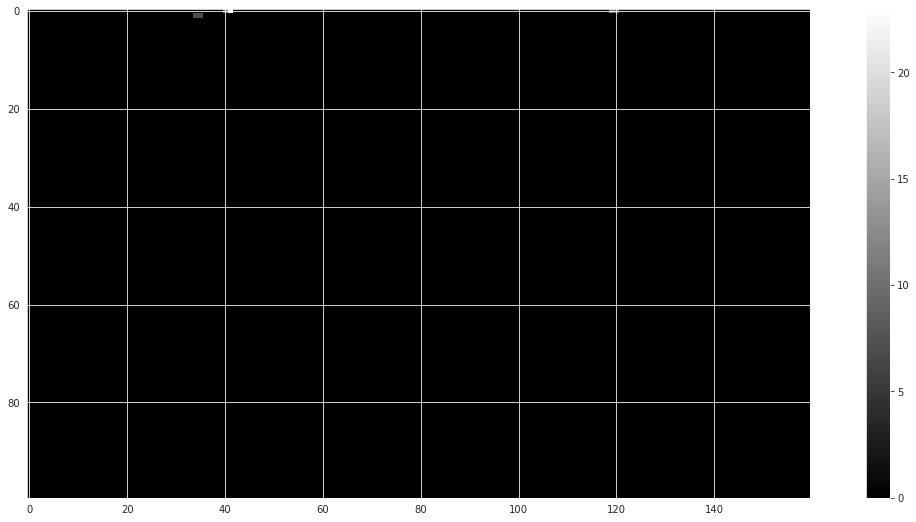

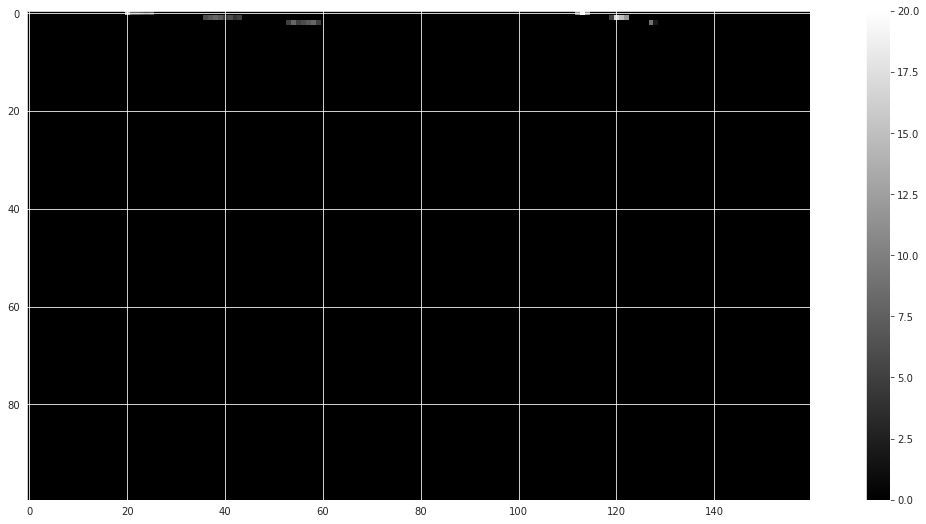

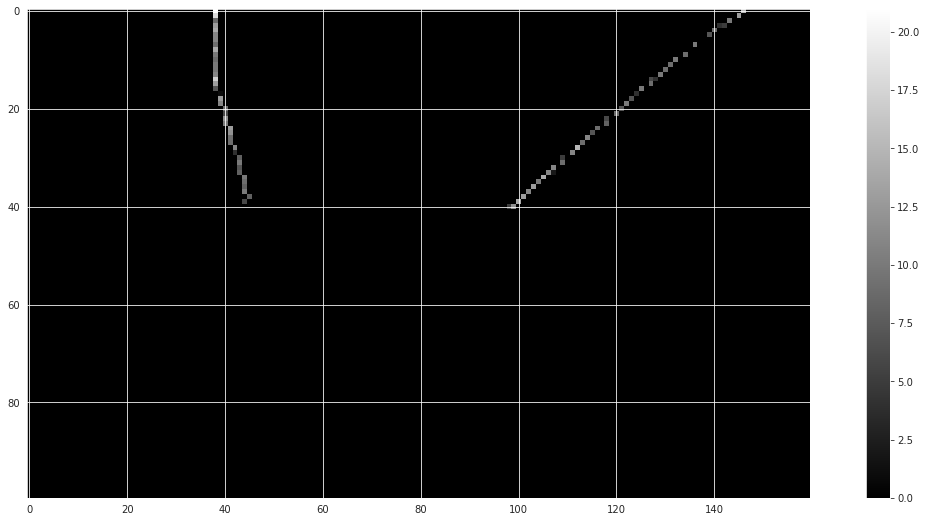

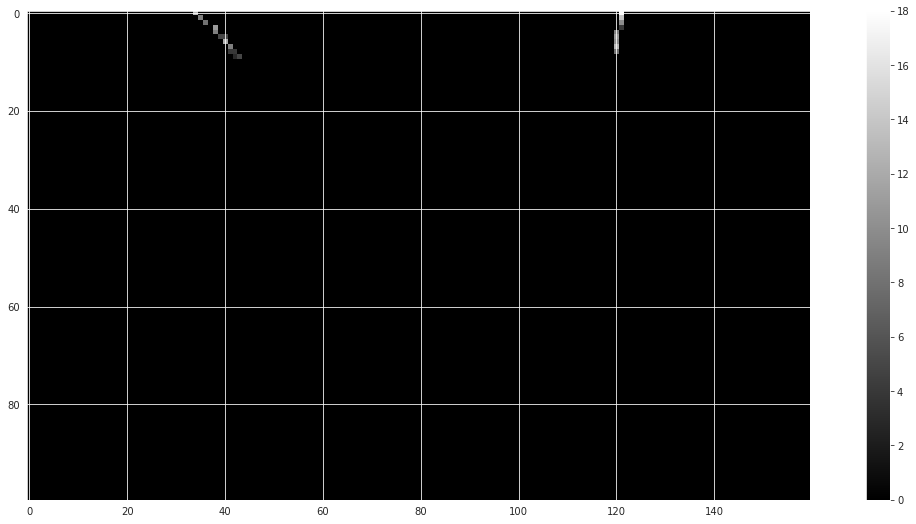

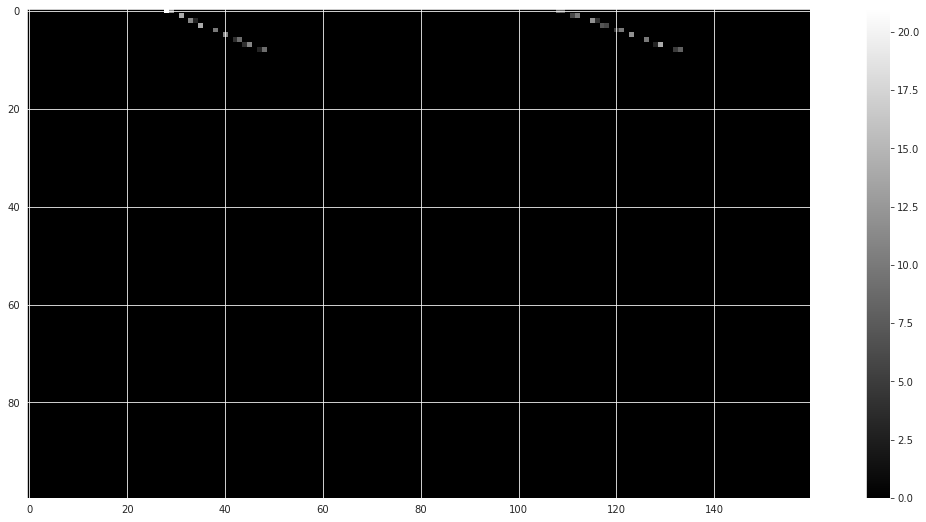

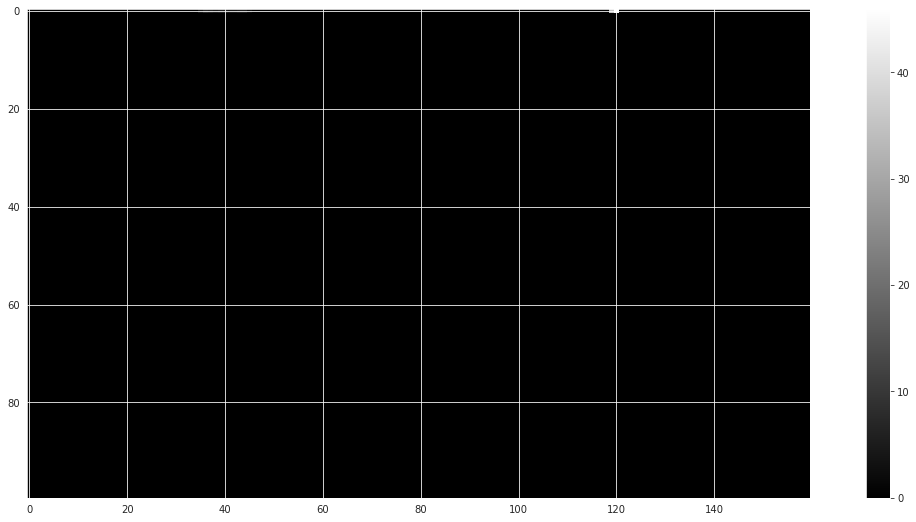

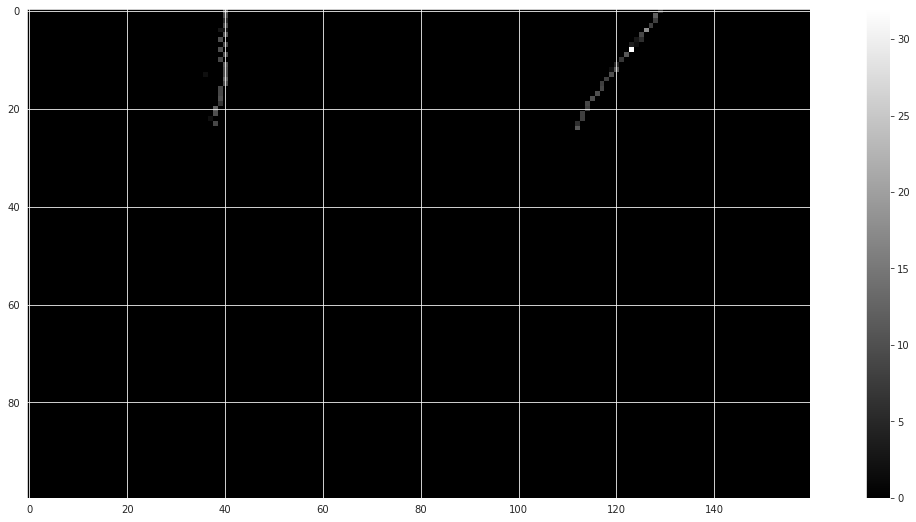

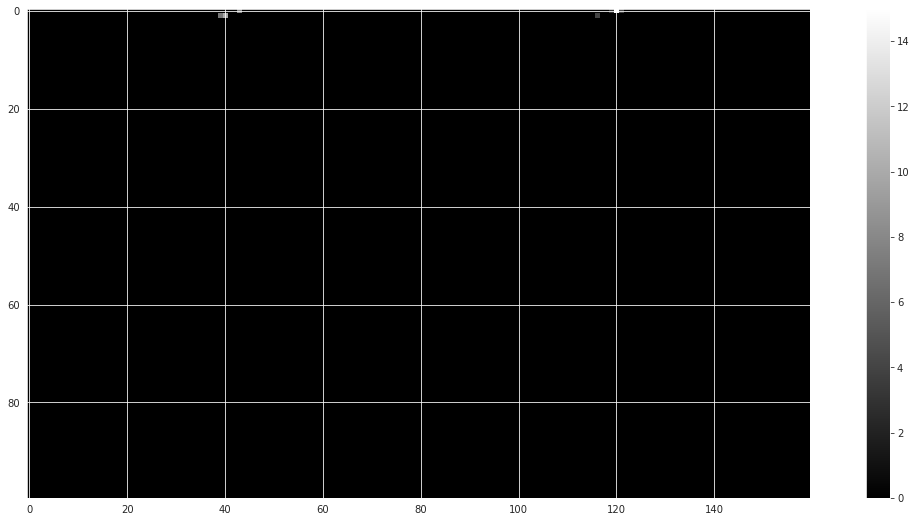

/tmp/ipykernel_13339/1764198298.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


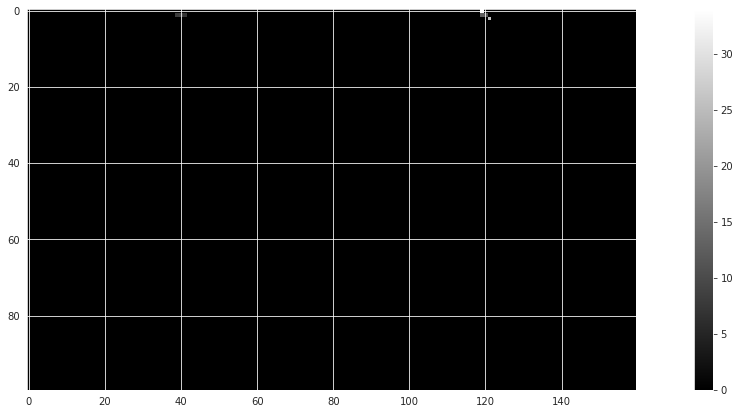

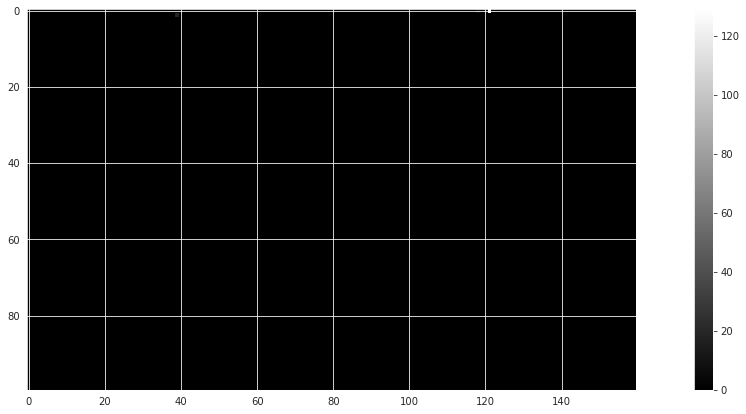

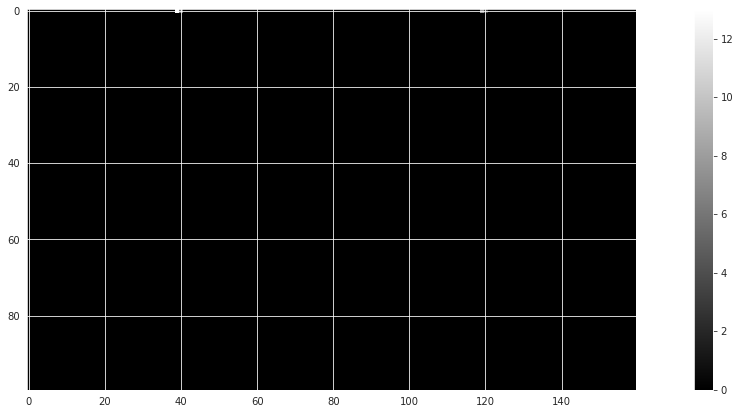

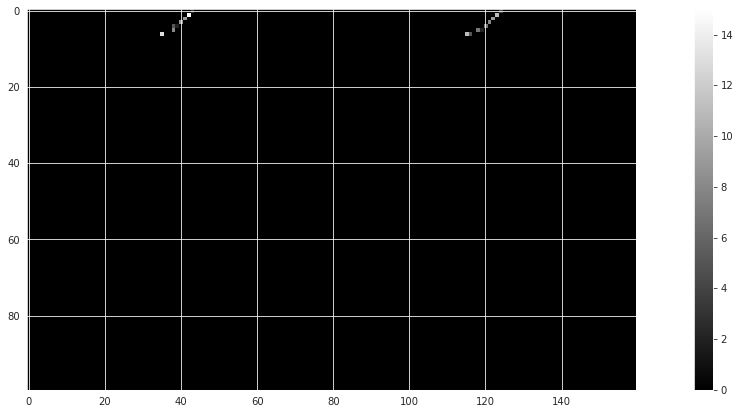

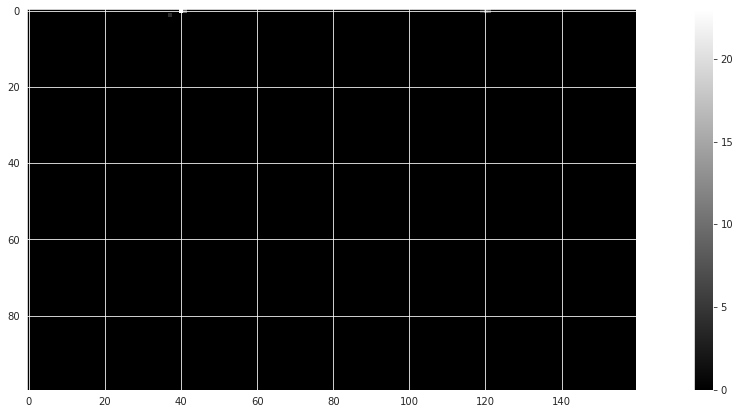

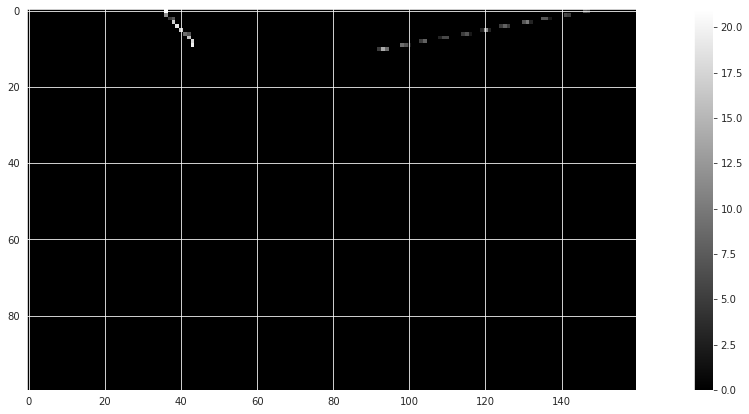

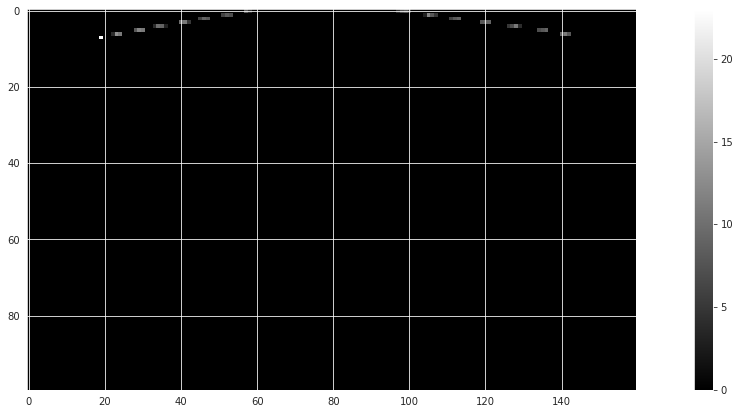

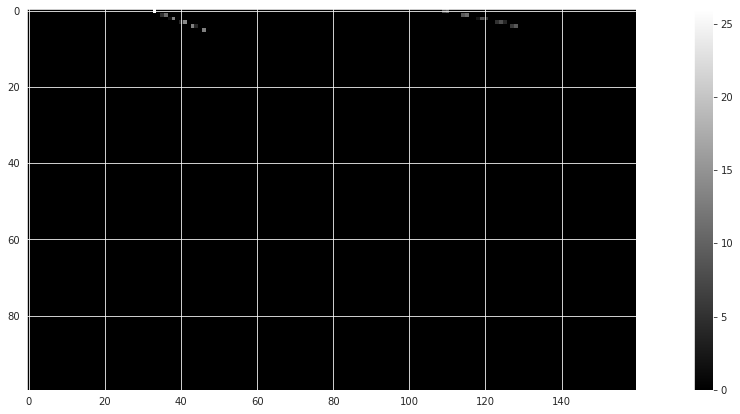

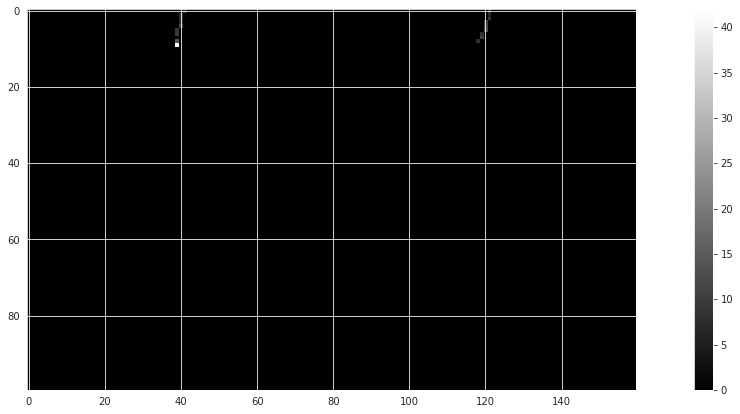

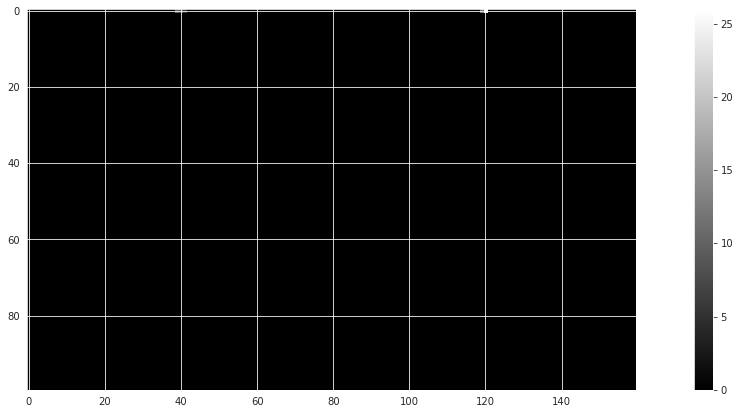

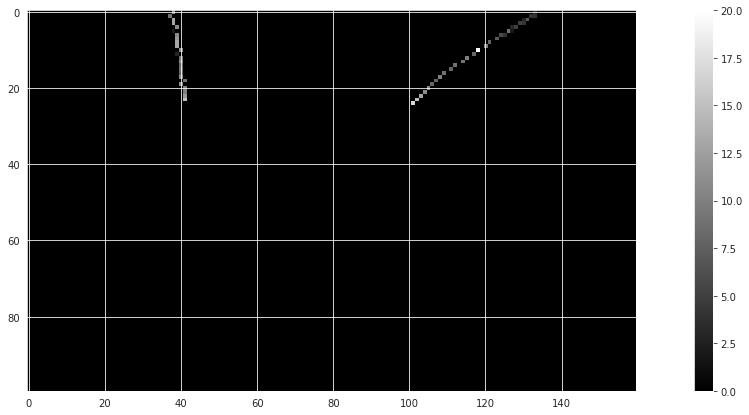

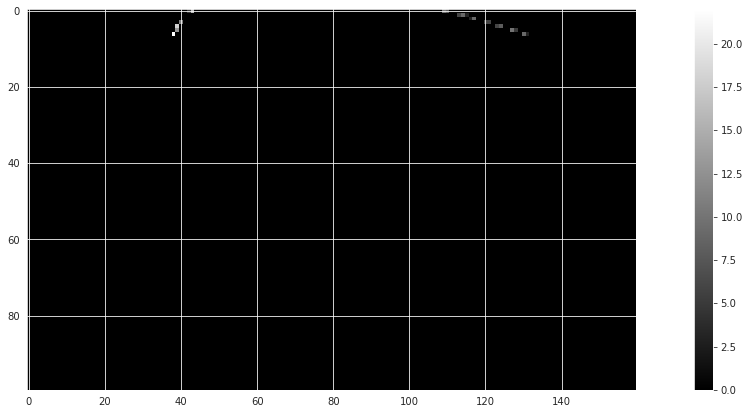

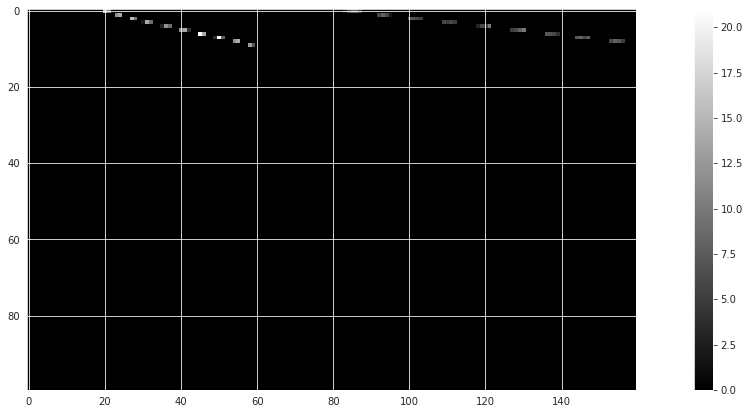

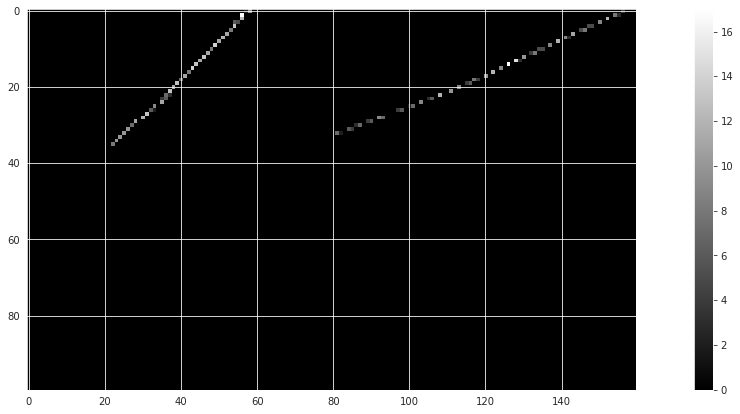

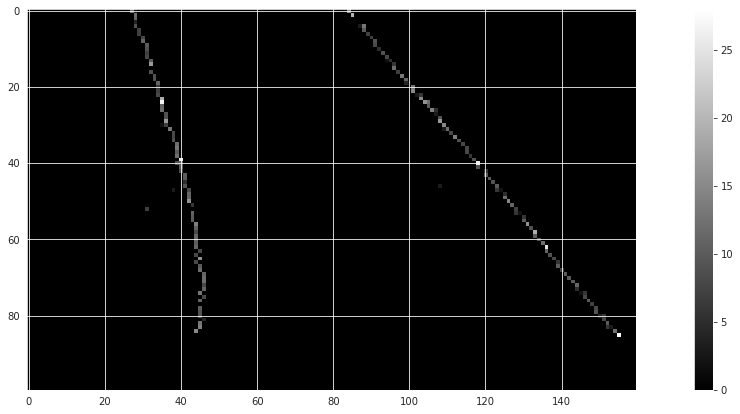

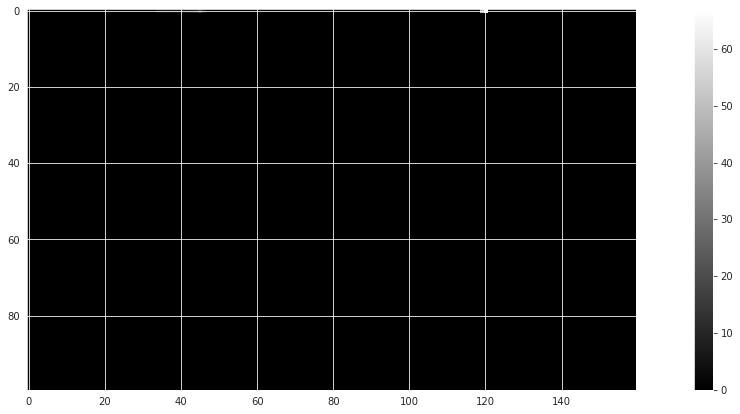

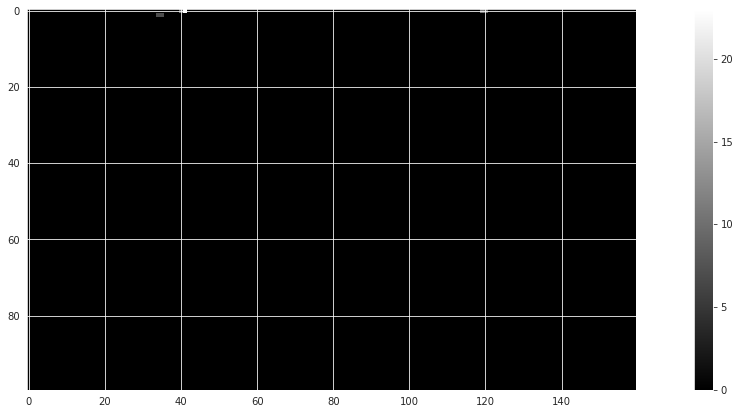

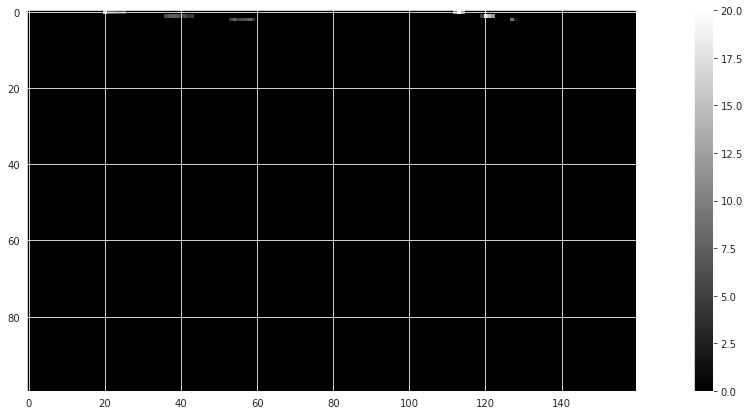

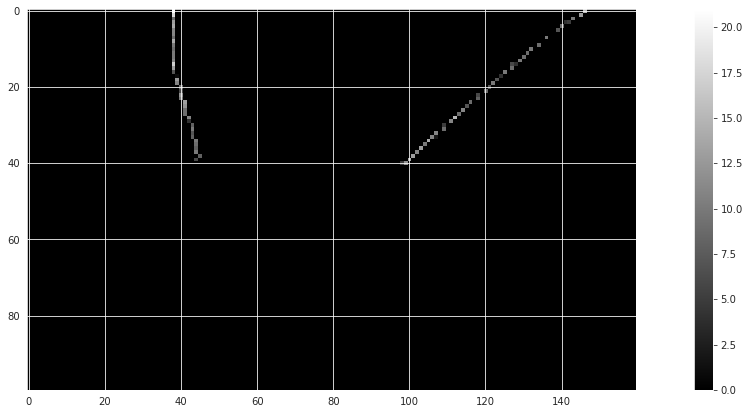

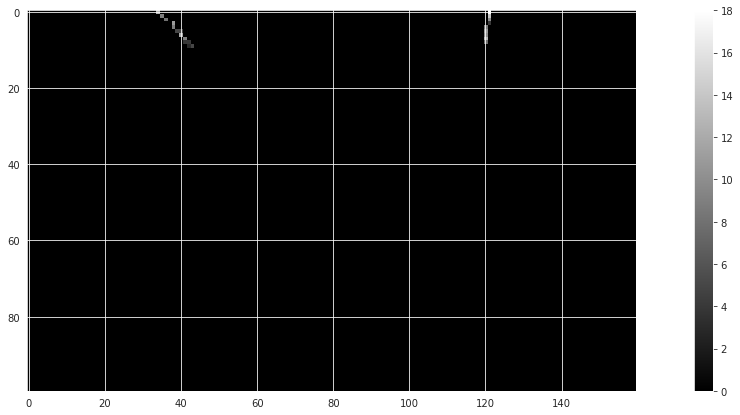

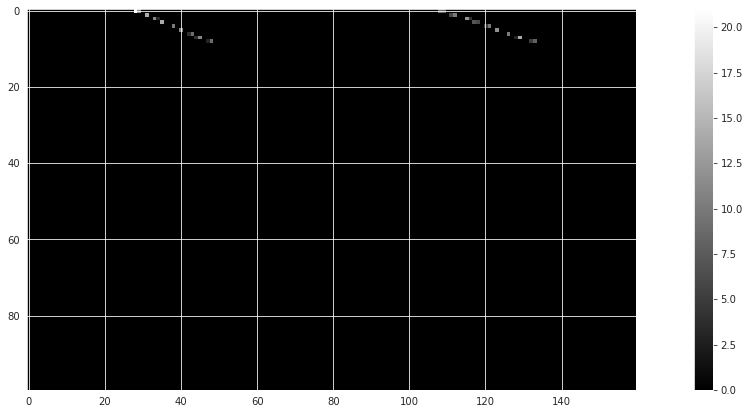

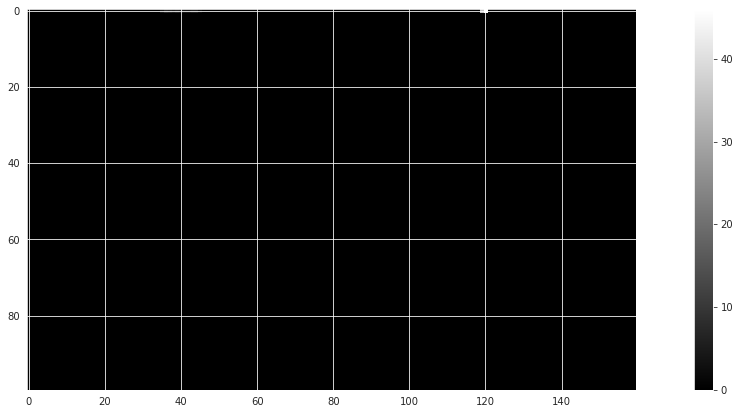

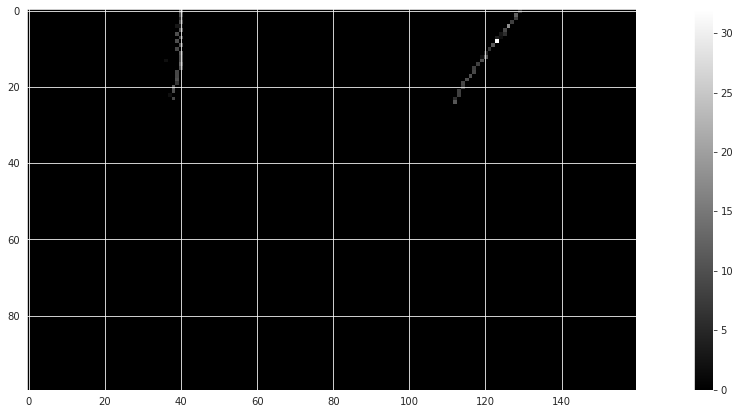

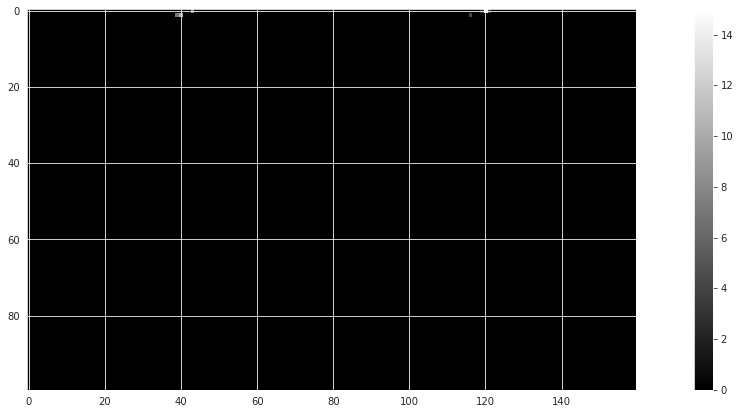

In [23]:
for i in dfpred.index:
    pm=f['pm'][i]
    pm=pm.reshape((2,100,80))
    pm=np.concatenate((pm[0].reshape((100,80)),pm[1].reshape((100,80))),axis = 1)
    pm = np.stack((pm,)*3, axis=-1)
    max=np.max(pm)
    pm= pm /max
    plt.imshow(pm,cmap='gray',vmin=0, vmax=max)
    plt.colorbar()
    plt.show()
    img = im.fromarray((pm * 255).astype(np.uint8))
    img.save('pm.jpg')

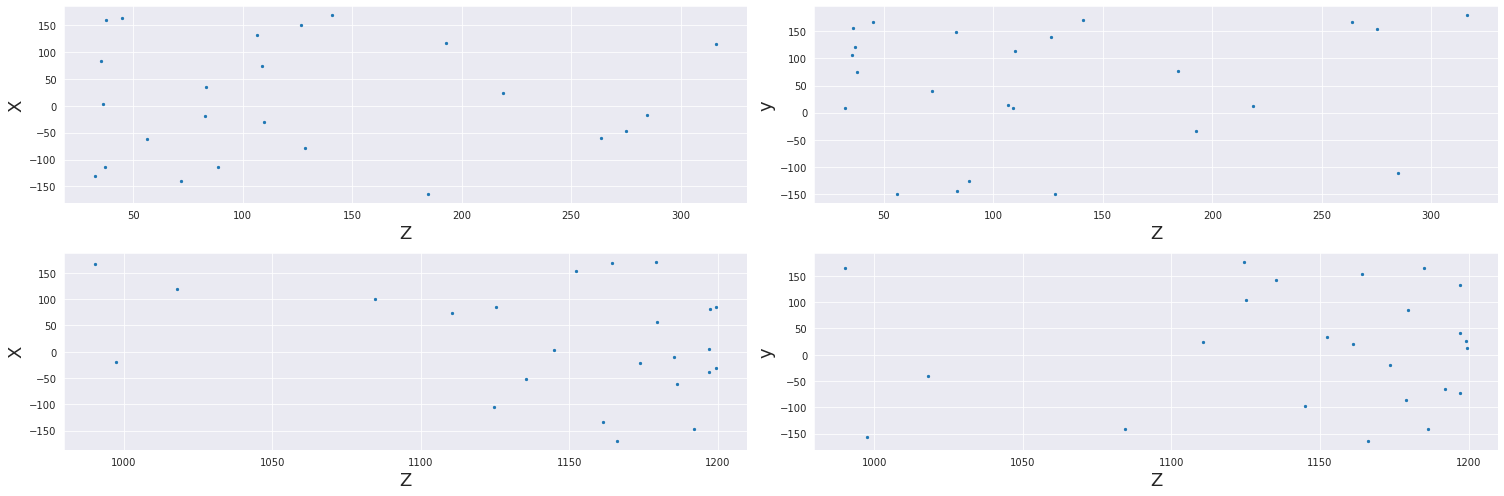

In [21]:
select_m = dfpred


rcParams['figure.figsize'] = 21, 7
fig, ((vtx_xz, vtx_yz), (stop_xz, stop_yz)) = plt.subplots(nrows=2, ncols=2)
df = (select_m[select_m['label_true'] == 'muon'])

vtx_xz.scatter(df['vtx.z'], df['vtx.x'], s=5, vmin=1)
vtx_xz.set_ylabel('X', size=18)
vtx_xz.set_xlabel('Z', size=18)
vtx_xz.grid(True)

vtx_yz.scatter(df['vtx.z'], df['vtx.y'], s=5, vmin=1)
vtx_yz.set_ylabel('y', size=18)
vtx_yz.set_xlabel('Z', size=18)

vtx_yz.grid(True)

stop_xz.scatter(df['stop.z'], df['stop.x'], s=5, vmin=1)
stop_xz.set_ylabel('X', size=18)
stop_xz.set_xlabel('Z', size=18)
stop_xz.grid(True)

stop_yz.scatter(df['stop.z'], df['stop.y'], s=5, vmin=1)
stop_yz.set_ylabel('y', size=18)
stop_yz.set_xlabel('Z', size=18)

stop_yz.grid(True)

fig.tight_layout()
plt.show()

/tmp/ipykernel_13339/166078214.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


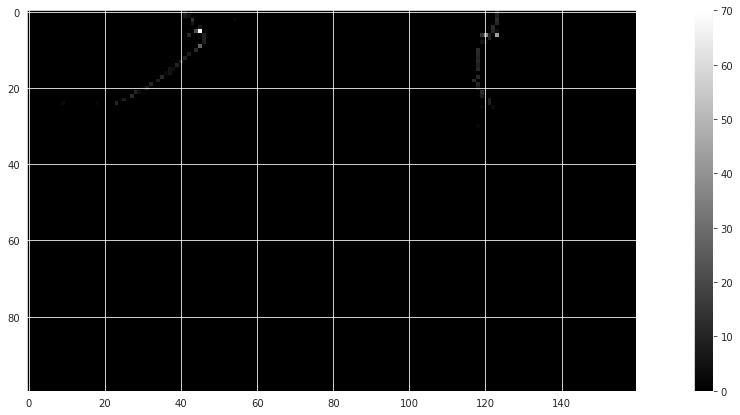

In [22]:

pm=f['pm'][9]
pm=pm.reshape((2,100,80))
pm=np.concatenate((pm[0].reshape((100,80)),pm[1].reshape((100,80))),axis = 1)
pm = np.stack((pm,)*3, axis=-1)
max=np.max(pm)
pm= pm /max
plt.imshow(pm,cmap='gray',vmin=0, vmax=max)
plt.colorbar()
plt.show()
img = im.fromarray((pm * 255).astype(np.uint8))
img.save('pm.jpg')